# Курсовая работа
Ник на Kagglle - Ann-Ko

### Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
from random import randint
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2
from sklearn.ensemble import VotingRegressor
import seaborn as sns


plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    trR2 = round(r2(train_true_values, train_pred_values), 3)
    tsR2 = round(r2(test_true_values, test_pred_values), 3)
    
    print("Train R2:\t" + str(trR2))
    print("Test R2:\t" + str(tsR2))
    print('Delta R2:\t' + str(trR2 - tsR2))
    
    plt.figure(figsize=(12,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

In [ ]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'

In [ ]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_test = pd.read_csv(TEST_DATASET_PATH)
df_train.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038          35    2.0  47.981561   29.442751            6.0      7   
1  15053          41    3.0  65.683640   40.049543            8.0      7   
2   4765          53    2.0  44.947953   29.197612            0.0      8   
3   5809          58    2.0  53.352981   52.731512            9.0      8   
4  10783          99    1.0  39.649192   23.776169            7.0     11   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0         9.0       1969   0.089040         B         B        33      7976   
1         9.0       1978   0.000070         B         B        46     10309   
2        12.0       1968   0.049637         B         B        34      7759   
3        17.0       1977   0.437885         B         B        23      5735   
4        12.0       1976   0.012339         B         B        35      5776   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
0         5           NaN            0       11       B  184966.930730  
1         1         240.0            1       16       B  300009.450063  
2         0         229.0            1        3       B  220925.908524  
3         3        1084.0            0        5       B  175616.227217  
4         1        2078.0            2        4       B  150226.531644

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [ ]:
df_train.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

#### EDA

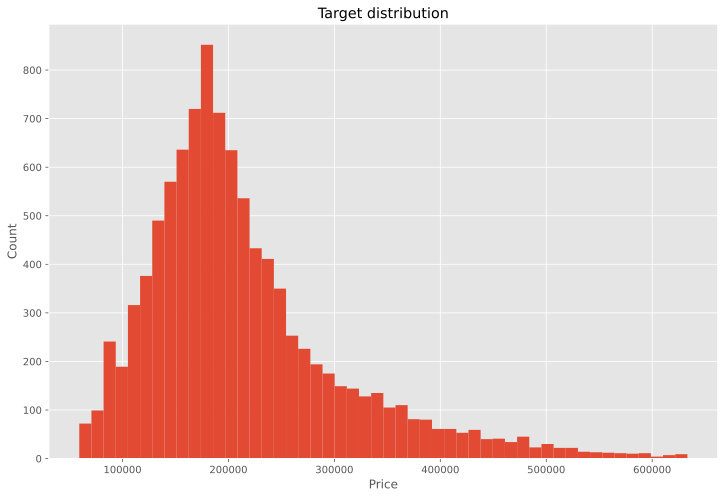

In [ ]:
plt.figure(figsize = (12, 8))

df_train['Price'].hist(bins=50)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')

plt.show()

#### Обзор количественных переменных

In [ ]:
df_train.describe().transpose()

count           mean            std           min  \
Id             10000.0    8383.407700    4859.019020      0.000000   
DistrictId     10000.0      50.400800      43.587592      0.000000   
Rooms          10000.0       1.890500       0.839512      0.000000   
Square         10000.0      56.315775      21.058732      1.136859   
LifeSquare      7887.0      37.199645      86.241209      0.370619   
KitchenSquare  10000.0       6.273300      28.560917      0.000000   
Floor          10000.0       8.526700       5.241148      1.000000   
HouseFloor     10000.0      12.609400       6.775974      0.000000   
HouseYear      10000.0    3990.166300  200500.261427   1910.000000   
Ecology_1      10000.0       0.118858       0.119025      0.000000   
Social_1       10000.0      24.687000      17.532614      0.000000   
Social_2       10000.0    5352.157400    4006.799803    168.000000   
Social_3       10000.0       8.039200      23.831875      0.000000   
Healthcare_1    5202.0    1142.904460    1021.517264      0.000000   
Helthcare_2    10000.0       1.319500       1.493601      0.000000   
Shops_1        10000.0       4.231300       4.806341      0.000000   
Price          10000.0  214138.857399   92872.293865  59174.778028   

                         25%            50%            75%           max  
Id               4169.500000    8394.500000   12592.500000  1.679800e+04  
DistrictId         20.000000      36.000000      75.000000  2.090000e+02  
Rooms               1.000000       2.000000       2.000000  1.900000e+01  
Square             41.774881      52.513310      65.900625  6.410652e+02  
LifeSquare         22.769832      32.781260      45.128803  7.480592e+03  
KitchenSquare       1.000000       6.000000       9.000000  2.014000e+03  
Floor               4.000000       7.000000      12.000000  4.200000e+01  
HouseFloor          9.000000      13.000000      17.000000  1.170000e+02  
HouseYear        1974.000000    1977.000000    2001.000000  2.005201e+07  
Ecology_1           0.017647       0.075424       0.195781  5.218671e-01  
Social_1            6.000000      25.000000      36.000000  7.400000e+01  
Social_2         1564.000000    5285.000000    7227.000000  1.908300e+04  
Social_3            0.000000       2.000000       5.000000  1.410000e+02  
Healthcare_1      350.000000     900.000000    1548.000000  4.849000e+03  
Helthcare_2         0.000000       1.000000       2.000000  6.000000e+00  
Shops_1             1.000000       3.000000       6.000000  2.300000e+01  
Price          153872.633942  192269.644879  249135.462171  6.332335e+05

Признаки с которыми будем работать: Rooms, Square, LifeSquare, KitchenSquare, Floor, HouseFloor, HouseYear

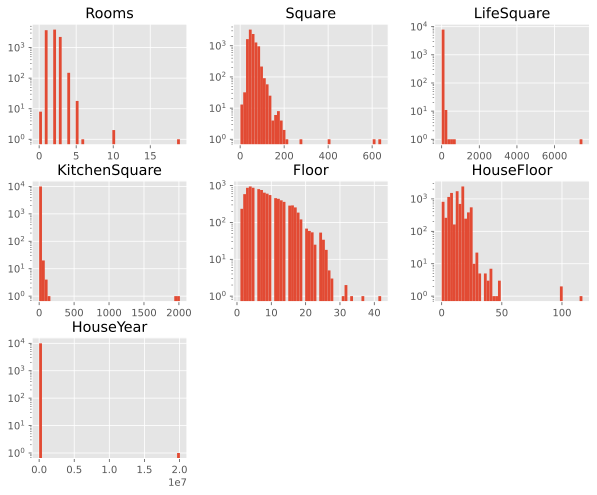

In [ ]:
# рассматриваем значимые количественные признаки 


num_features = df_train[['Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear'
 ]]

num_features.hist(figsize=(10, 8), bins=50, log=True);

#### Year
Вручную исправим два выброса и добавим замену значений года выше 2021.
#### Floor / House floor
Нулевые значения заменим медианой по району и году постройки. Там где это будет невозможно заменим медианой по району.
#### KitchenSquare
Значения площади кухни больше 95-го квантиля будут заменены на медиану.
Значения площади кухни меньше 3-х будут заменены на 3.
#### Square
Значения общей площади меньше площади кухни умножаем на 10.
#### Rooms
Выбросы по комнатам будут заменены на медиану взятую для соответствующей общей площади.
#### Healthcare_1
Будет удалён

#### Обзор номинативных переменных

In [ ]:
list(df_train.select_dtypes(exclude=np.number).columns)

['Ecology_2', 'Ecology_3', 'Shops_2']

In [ ]:
for el in list(df_train.select_dtypes(include=object).columns):
    print (f'{df_train[el].value_counts()}\n')

B    9903
A      97
Name: Ecology_2, dtype: int64

B    9725
A     275
Name: Ecology_3, dtype: int64

B    9175
A     825
Name: Shops_2, dtype: int64



### Создаем класс для предобработки данных

In [ ]:
class Preprocessing:
    
    def __init__(self):
                
        self.medians=None
        self.kitchen_square_quantile = None
        self.dist_year = None
        self.dist = None
        self.cat_to_num = None
        
        
    def prep(self, df):
        
        # Расчет медиан и квантиля
        self.medians = df.median()
        self.kitchen_square_quantile = df['KitchenSquare'].quantile(.95)
    
    def process(self, df):
        
        # исправление годов на обучающих данных
    
        df.loc[df['HouseYear'] == 4968, 'HouseYear'] = 1968
        df.loc[df['HouseYear'] == 20052011, 'HouseYear'] = 2011
        
        # исправление года для остальных случаев
        df.loc[df['HouseYear'] > 2021, 'HouseYear'] = 2021

        # HouseFloor, Floor   
        self.dist_year = df.groupby(['DistrictId', 'HouseYear'], as_index=False).agg(
            {'HouseFloor': 'median'}).rename(
            columns={'HouseFloor': 'House_Floor_Median'})
        self.dist = df.groupby(['DistrictId'], as_index=False).agg(
            {'HouseFloor': 'median'}).rename(
            columns={'HouseFloor': 'House_Floor_Median_2'})
        df = pd.merge(df, self.dist_year, on=['DistrictId', 'HouseYear'], how='left')
        df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = df['House_Floor_Median'].astype(int)
        df = pd.merge(df, self.dist, on=['DistrictId'], how='left')
        df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = df['House_Floor_Median_2'].astype(int)
        df.drop(['House_Floor_Median', 'House_Floor_Median_2'], axis=1, inplace=True)
        df.loc[df['Floor'] > df['HouseFloor'], 'Floor'] = df.loc[df['Floor'] > df['HouseFloor'], 'HouseFloor'] \
                                                    .apply(lambda x: randint(1, x))
        
        
        
        # KitchenSquare
        df.loc[df['KitchenSquare'] > self.kitchen_square_quantile, 'KitchenSquare'] \
        = self.medians['KitchenSquare']
        df.loc[df['KitchenSquare'] < 3, 'KitchenSquare'] = 3
        
        # Square
        df.loc[df['KitchenSquare'] > df['Square'], 'Square'] = df['Square'] * 10
         
        
        
        # LifeSquare
        
        df['LifeSquare_NA'] = df['LifeSquare'].isna() * 1
        df.loc[df['LifeSquare'].isna(), 'LifeSquare'] \
            = df.loc[df['LifeSquare'].isna(), \
                           'Square'] - df.loc[df['LifeSquare'].isna(), 'KitchenSquare']
        
      
        
        # Rooms
        df['Rooms_Out'] = 0
        df.loc[(df['Rooms'] == 0) | (df['Rooms'] >= 6), 'Rooms_Out'] = 1
        df['SquareRnd'] = df['Square'].round()
        
        
        rooms_med = df.groupby(['SquareRnd'], as_index=False).agg(
            {'Rooms': 'median'}).rename(
            columns={'Rooms': 'Rooms_Median'})
        df = pd.merge(df, rooms_med, on=['SquareRnd'], how='left')
        df.loc[df['Rooms_Out'] == 1, 'Rooms'] = df['Rooms_Median'].astype(int)
        df.loc[df['Rooms'] == 0, 'Rooms'] = 1
        
        
        
        # Healthcare_1
        if 'Healthcare_1' in df.columns:
            df.drop('Healthcare_1', axis=1, inplace=True)
        
        
        # Binary features
        self.cat_to_num = {'A': 1, 'B': 0}
        df['Ecology_2'] = df['Ecology_2'].map(self.cat_to_num)
        df['Ecology_3'] = df['Ecology_3'].map(self.cat_to_num)
        df['Shops_2'] = df['Shops_2'].map(self.cat_to_num)       
        
        
        
        
        return df

#### Выбираем признаки

In [ ]:
df_train.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price']

In [ ]:
# новые признаки не добавляем
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
                 'Helthcare_2', 'Shops_1', 'Shops_2']

target_val = 'Price'

### Разбиваем данные

In [ ]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_test = pd.read_csv(TEST_DATASET_PATH)

X = df_train.drop(columns=target_val)
y = df_train[target_val]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
preprocessor = Preprocessing()
preprocessor.prep(X_train)

X_train = preprocessor.process(X_train)
X_valid = preprocessor.process(X_valid)
df_test = preprocessor.process(df_test)

X_train.shape, X_valid.shape, df_test.shape

((7500, 22), (2500, 22), (5000, 22))

In [ ]:
X_train = X_train[feature_names]
X_valid = X_valid[feature_names]
df_test = df_test[feature_names]

In [ ]:
X_train.isna().sum().sum(), X_valid.isna().sum().sum(), df_test.isna().sum().sum()

(0, 0, 0)

#### Протестированные модели:
    Linear Regression
    Random Forest Regressor
    GradientBoostingRegressor
    
    Гиперпараметры были подобраны через GridSearchCV
    
    В итоге была выбрана модель Voting Regressor для балансировки результатов GradientBoostingRegressor и RandomForestRegressor

### Gradien Boosting Regressor

In [ ]:
gb_model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=5,
                                     min_samples_leaf=8,
                                     random_state=42,  
                                     n_estimators=150)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(criterion='mse', max_depth=5, min_samples_leaf=8,
                          n_estimators=150, random_state=42)

Train R2:	0.853
Test R2:	0.734
Delta R2:	0.119


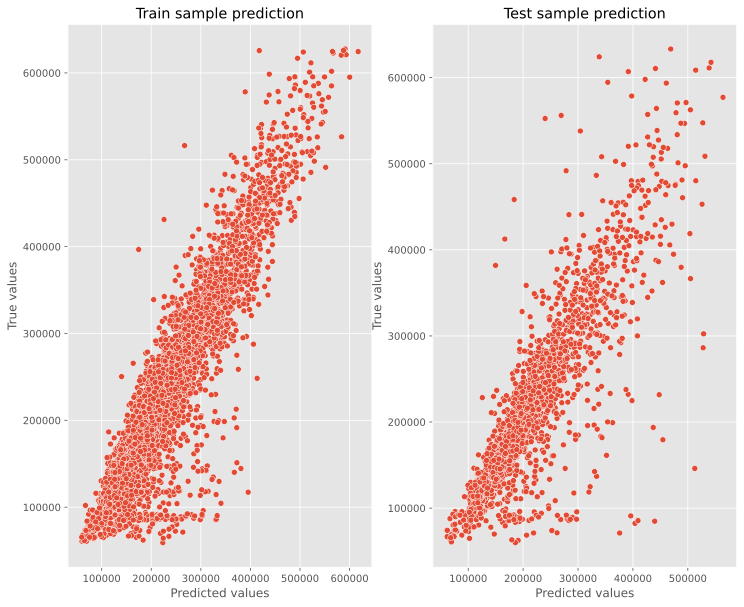

In [ ]:
y_train_preds = gb_model.predict(X_train)
y_test_preds = gb_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

### Random forest Regressor

In [ ]:
rf_model = RandomForestRegressor(n_estimators=1000, max_depth=17, random_state=42, max_features=4)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=17, max_features=4, n_estimators=1000,
                      random_state=42)

Train R2:	0.951
Test R2:	0.725
Delta R2:	0.22599999999999998


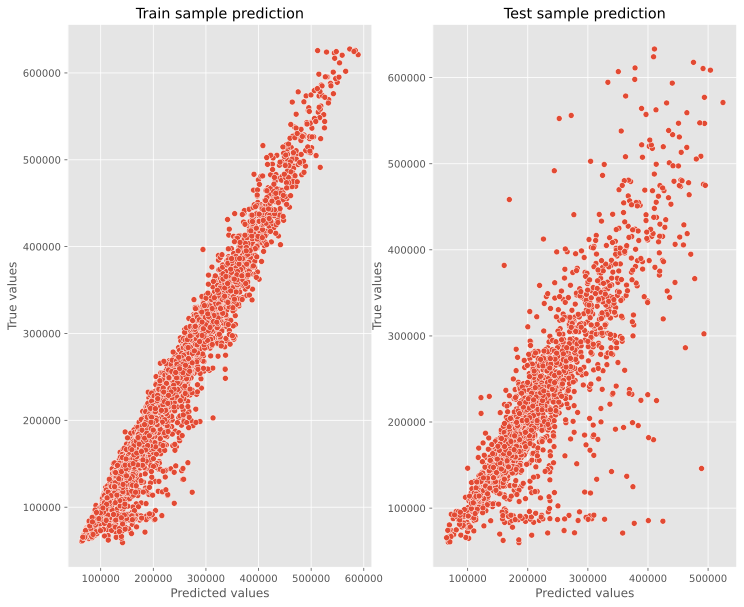

In [ ]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

### Voting regressor на основе двух предыдущих моделей

In [ ]:
model_1 = GradientBoostingRegressor(criterion='mse',
                                     max_depth=5,
                                     min_samples_leaf=8,
                                     random_state=42,  
                                     n_estimators=150)

model_2 = RandomForestRegressor(n_estimators=1000, max_depth=17, random_state=42, max_features=4)

vr_model = VotingRegressor([('model_1', model_1), ('model_2', model_2)])

vr_model.fit(X_train, y_train)

VotingRegressor(estimators=[('model_1',
                             GradientBoostingRegressor(criterion='mse',
                                                       max_depth=5,
                                                       min_samples_leaf=8,
                                                       n_estimators=150,
                                                       random_state=42)),
                            ('model_2',
                             RandomForestRegressor(max_depth=17, max_features=4,
                                                   n_estimators=1000,
                                                   random_state=42))])

Train R2:	0.912
Test R2:	0.737
Delta R2:	0.17500000000000004


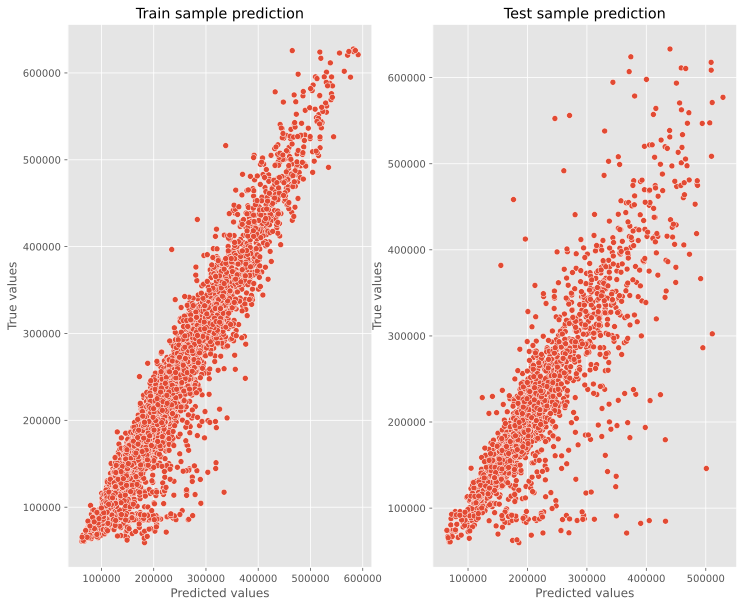

In [ ]:
y_train_preds = vr_model.predict(X_train)
y_test_preds = vr_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

### Делаем прогноз

In [ ]:
submit = pd.read_csv('sample_submission.csv')
submit.head()

Id     Price
0    725  200000.0
1  15856  200000.0
2   5480  200000.0
3  15664  200000.0
4  14275  200000.0

In [ ]:
predictions = vr_model.predict(df_test)
predictions

array([160469.70368515, 204885.61256505, 199836.80135027, ...,
       308037.88060637, 211220.92746623, 189122.09458502])

In [ ]:
submit['Price'] = predictions
submit.head()

Id          Price
0    725  160469.703685
1  15856  204885.612565
2   5480  199836.801350
3  15664  348073.109314
4  14275  138570.501210

### Выгружаем прогноз в файл

In [ ]:
submit.to_csv('MV_vr_prediction_opt.csv', index=False)